In [28]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (16, 10)
# mpl.rcParams['axes.grid'] = False

In [29]:
df = pd.read_csv('StockData.csv')
df.head()

,DATE,OP,MAXP,MINP,CLP,PERC,VOL,MA5,MA10,MA20,...,ZIG5,ZIGTRN,KDHL,KDCRS,OSC,OSCUD,OSCTRN,BBANDU,BBANDD,BBANDTCH
0,20131021,111.0,111.5,109.5,110.0,0.0000,41327.324,108.0,106.45,104.83,...,110.0,1.0,4.06,NaN,0.50,NaN,NaN,NaN,NaN,NaN
1,20131022,110.0,111.5,109.5,111.5,1.3636,39837.172,108.9,107.30,105.13,...,111.5,-1.0,9.38,0.0,0.62,1.0,0.0,NaN,NaN,NaN
2,20131023,111.0,111.5,110.0,111.0,-0.4484,23057.730,109.9,107.90,105.43,...,111.0,0.0,10.35,0.0,0.61,-1.0,-1.0,NaN,NaN,NaN
3,20131024,109.0,110.0,108.5,110.0,-0.9009,21570.336,110.5,108.40,105.78,...,110.5,0.0,5.88,0.0,0.50,-1.0,0.0,NaN,NaN,NaN
4,20131025,108.5,109.0,106.5,107.0,-2.7273,37244.500,109.9,108.45,106.05,...,110.0,0.0,0.00,-1.0,0.19,-1.0,0.0,NaN,NaN,NaN


In [30]:
df = df.loc[20:, ['DATE', 'OP', 'MAXP', 'MINP', 'CLP', 'PERC', 'VOL', 'MA5', 'MA10', 'MA20', 'MA60', 'BIAS5', 'BIAS10', 'ZIG5', 'ZIGTRN', 'KDHL', 'KDCRS', 'OSC', 'OSCTRN', 'BBANDTCH', 'CLPUDPY']]
date_time = pd.to_datetime(df.pop('DATE'), format='%Y%m%d')
df.head()

,OP,MAXP,MINP,CLP,PERC,VOL,MA5,MA10,MA20,MA60,BIAS5,BIAS10,ZIG5,ZIGTRN,KDHL,KDCRS,OSC,OSCTRN,BBANDTCH,CLPUDPY
20,104.5,105.0,104.0,104.0,0.0000,25297.465,103.9,105.05,107.35,104.52,0.10,-1.00,102.0,0.0,-4.97,1.0,-0.69,0.0,-1.0,1.0
21,104.5,105.5,104.0,105.0,0.9615,34510.121,103.9,104.90,107.03,104.66,1.06,0.10,101.5,0.0,0.00,0.0,-0.53,0.0,-1.0,1.0
22,104.0,104.0,102.5,103.0,-1.9048,46675.352,103.9,104.50,106.63,104.76,-0.87,-1.44,101.0,0.0,0.00,0.0,-0.54,-1.0,-1.0,0.0
23,102.0,103.0,100.5,101.0,-1.9417,57002.648,103.4,103.90,106.18,104.85,-2.32,-2.79,100.5,0.0,-3.15,-1.0,-0.64,0.0,-1.0,0.0
24,100.0,101.5,100.0,100.0,-0.9901,57158.109,102.6,103.30,105.83,104.90,-2.53,-3.19,100.0,1.0,-8.77,0.0,-0.73,0.0,-1.0,0.0


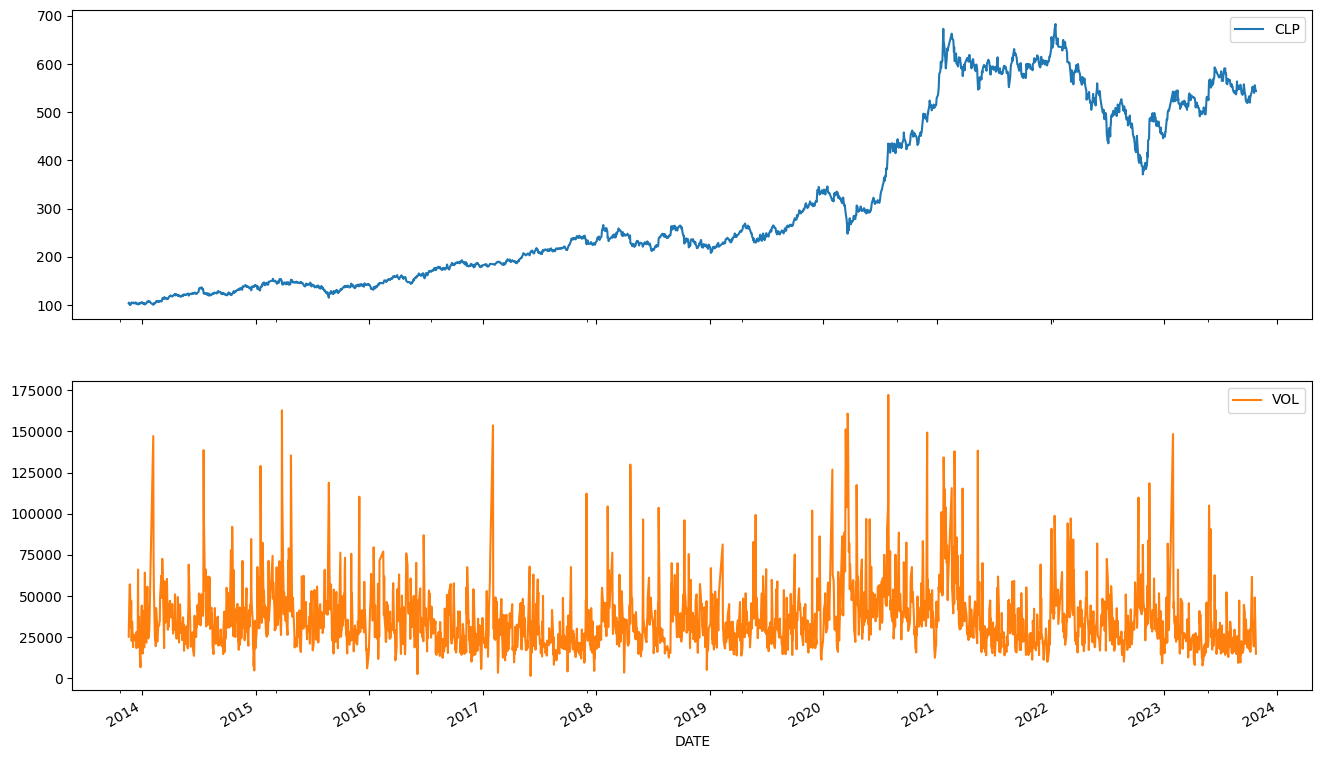

In [31]:
plot_cols = ['CLP', 'VOL']
plot_features = df[plot_cols][:]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OP,2429.0,308.973034,171.952401,100.0000,157.5000,241.000,491.5000,685.0000
MAXP,2429.0,311.108687,173.057114,101.5000,159.0000,242.500,495.0000,688.0000
MINP,2429.0,306.522231,170.548276,100.0000,156.5000,239.000,487.0000,678.0000
CLP,2429.0,308.875257,171.787850,100.0000,158.5000,240.500,490.5000,683.0000
PERC,2429.0,0.092176,1.558085,-8.3333,-0.8214,0.000,0.9709,9.9741
VOL,2429.0,35852.783646,19537.660547,1535.2300,23287.5860,31504.393,43079.0780,172157.7500
MA5,2429.0,308.510622,171.675084,101.7000,158.1000,240.600,490.3000,667.6000
MA10,2429.0,308.055661,171.546698,102.6500,158.1000,240.500,488.4000,658.8000
MA20,2429.0,307.171453,171.296404,103.1000,156.2500,239.980,482.7000,649.4000
MA60,2429.0,303.593911,170.272699,103.9000,153.9800,238.750,479.6600,625.5300


In [33]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n * 0.7)]
val_df = df[int(n * 0.7):int(n * 0.9)]
test_df = df[int(n * 0.9):]

num_features = df.shape[1]

In [34]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

C:\Users\userwei\AppData\Local\Temp\ipykernel_98960\3214313372.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


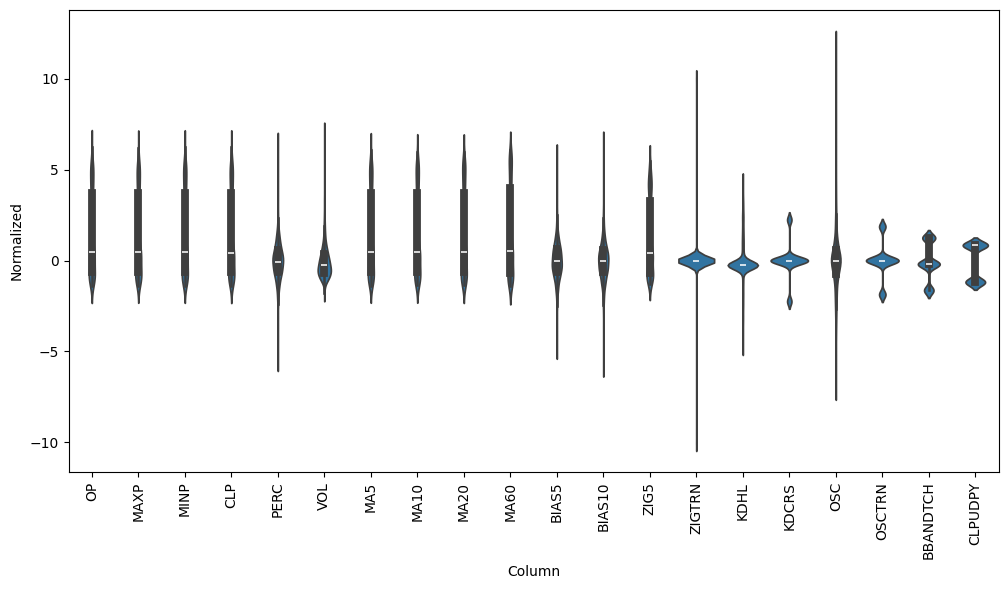

In [35]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [36]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [37]:
w = WindowGenerator(input_width=10, label_width=1, shift=1, label_columns=['CLPUDPY'])
w

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [10]
Label column name(s): ['CLPUDPY']

In [38]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [39]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w.total_window_size]),
                           np.array(train_df[100:100 + w.total_window_size]),
                           np.array(train_df[200:200 + w.total_window_size])])

example_inputs, example_labels = w.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 11, 20)
Inputs shape: (3, 10, 20)
Labels shape: (3, 1, 1)


In [40]:
w.example = example_inputs, example_labels

In [41]:
def plot(self, model=None, plot_col='CLPUDPY', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(16, 10))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [d]')

WindowGenerator.plot = plot

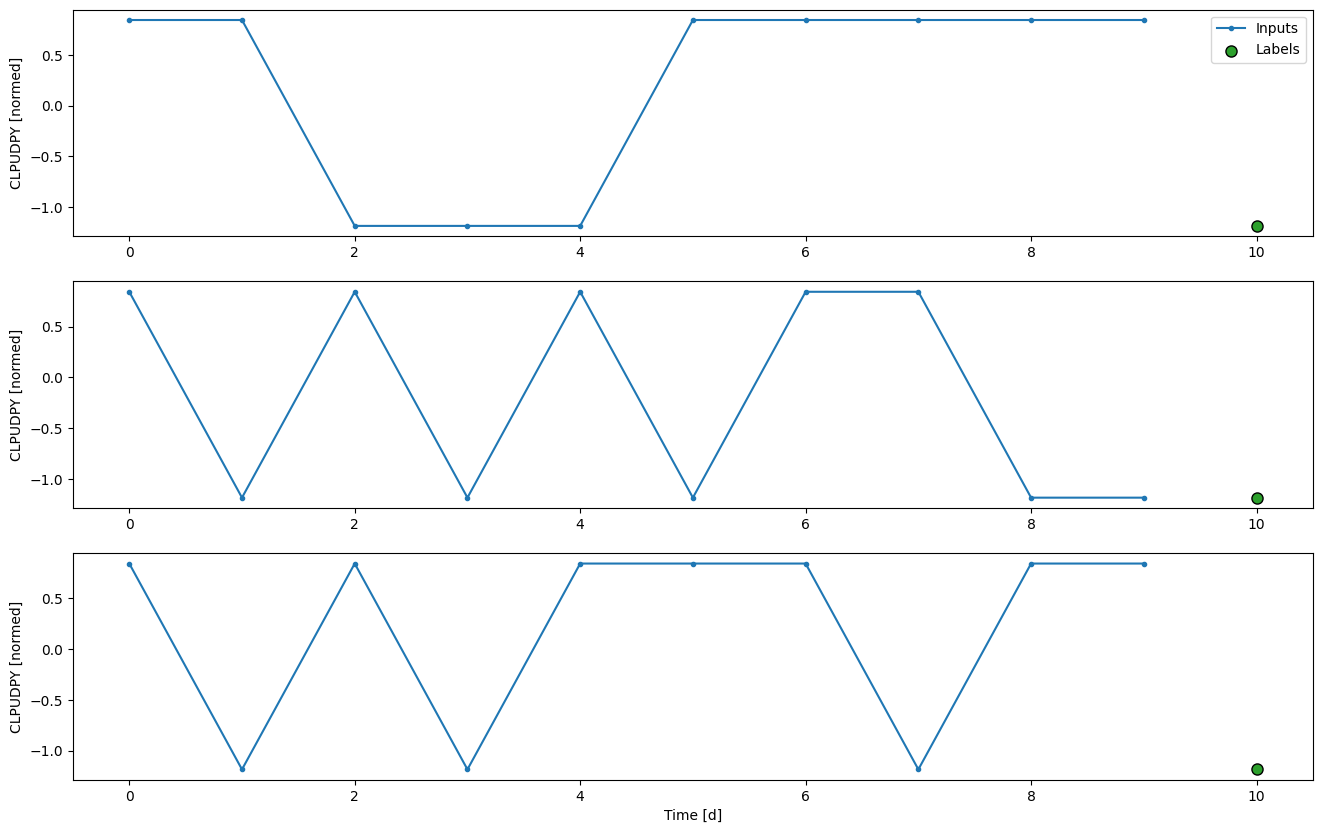

In [42]:
w.plot()

In [43]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [44]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [45]:
w.train.element_spec

(TensorSpec(shape=(None, 10, 20), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [46]:
for example_inputs, example_labels in w.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 10, 20)
Labels shape (batch, time, features): (32, 1, 1)


In [47]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

Total window size: 20
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [10 11 12 13 14 15 16 17 18 19]
Label column name(s): None

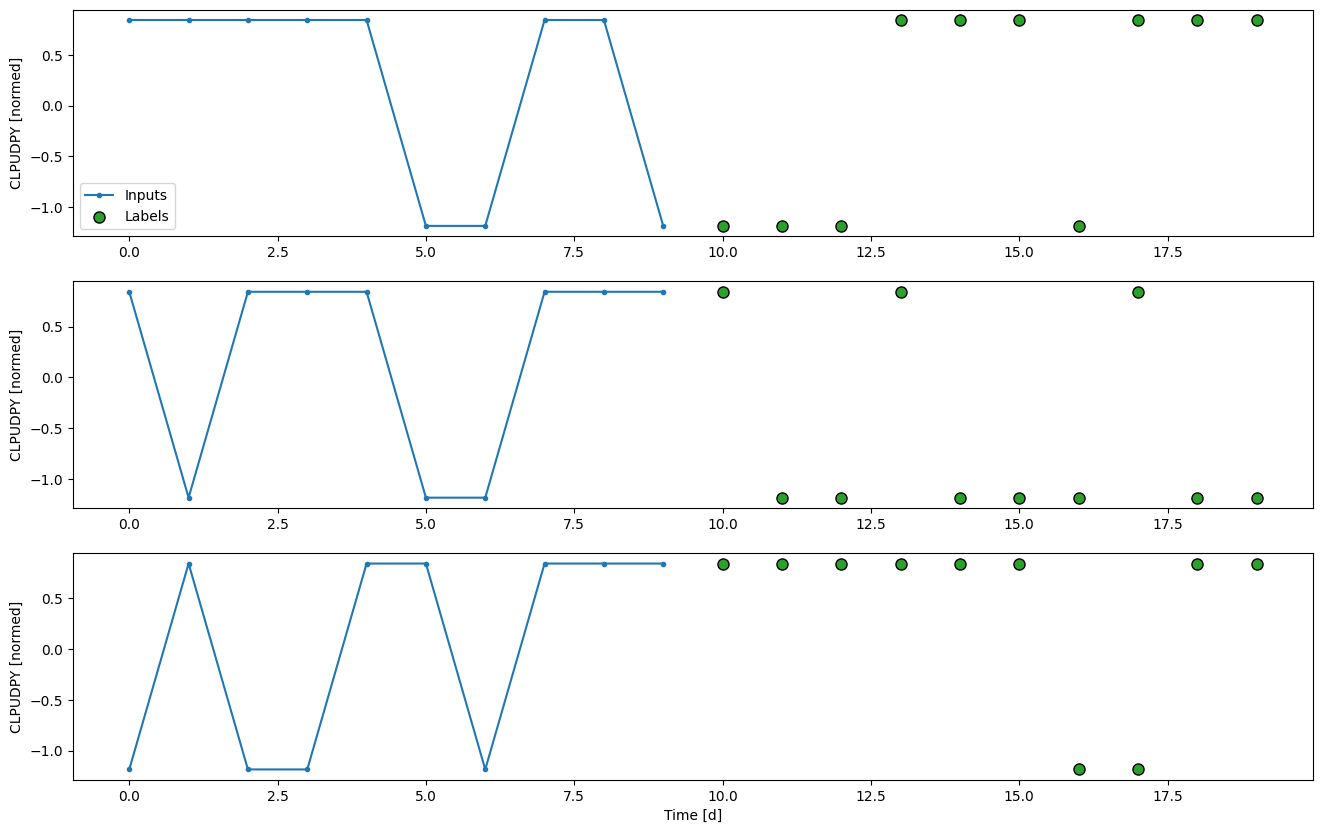

In [48]:
OUT_STEPS = 10
multi_window = WindowGenerator(input_width=10,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

15/15 [==============================] - 0s 1ms/step - loss: 1.4719 - mean_absolute_error: 0.6135


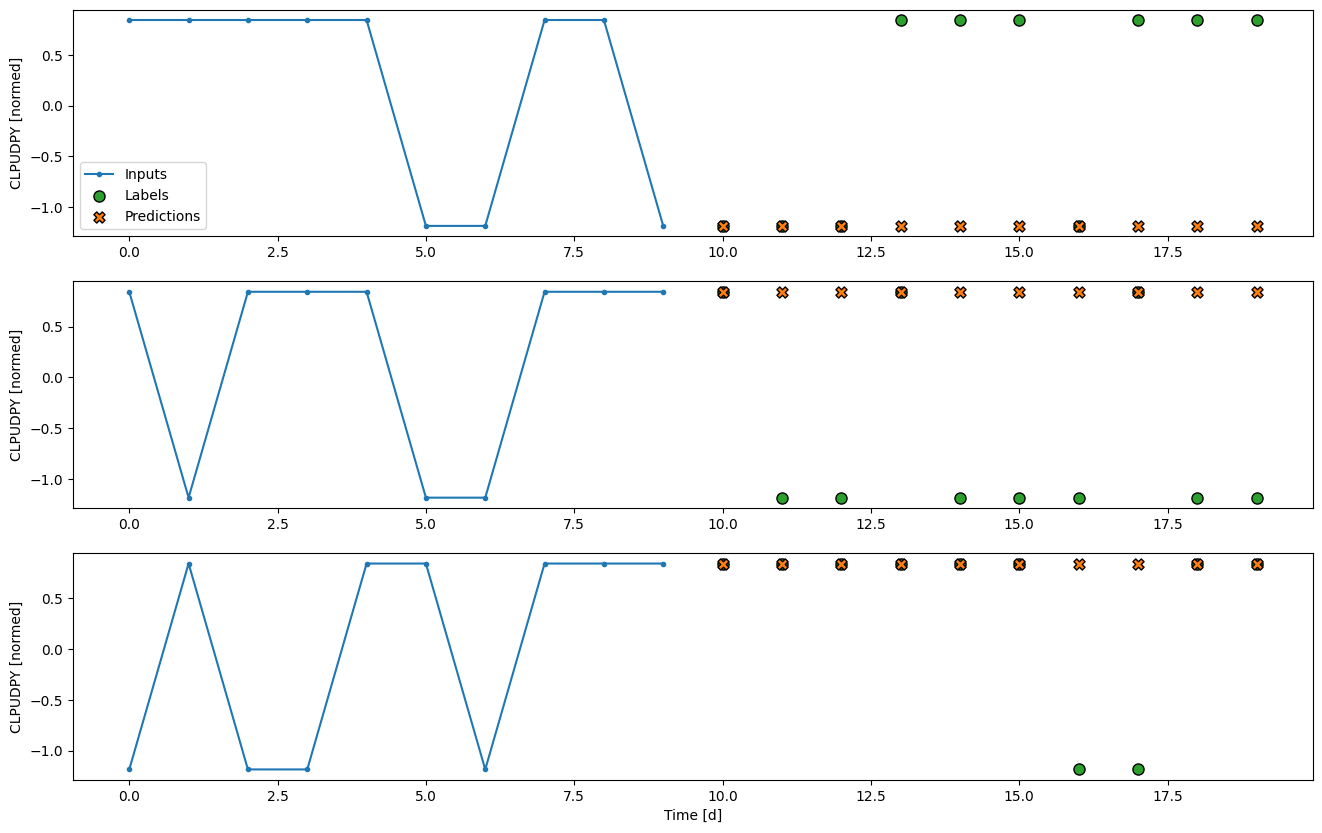

In [49]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

15/15 [==============================] - 0s 1ms/step - loss: 1.9279 - mean_absolute_error: 0.7367


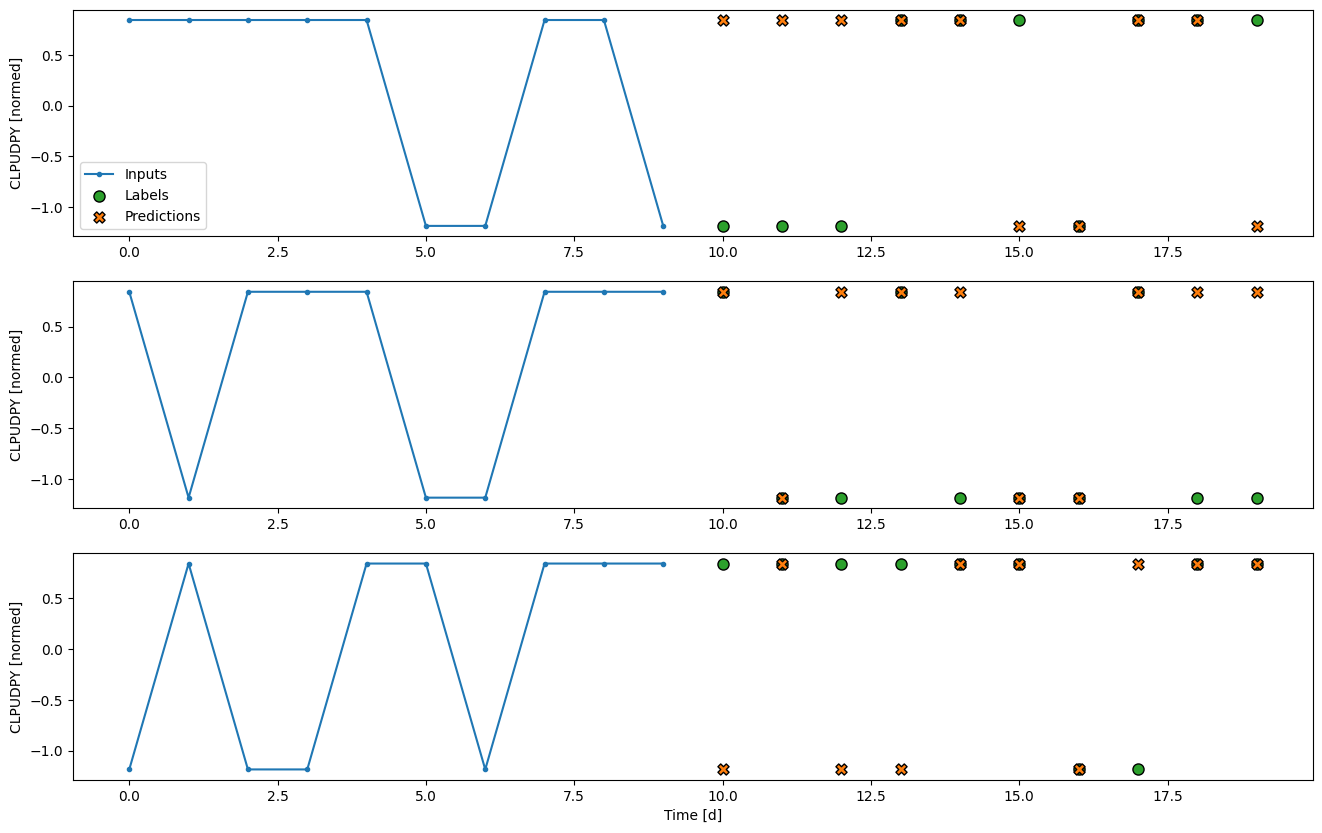

In [50]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

15/15 [==============================] - 0s 1ms/step - loss: 0.8747 - mean_absolute_error: 0.5582


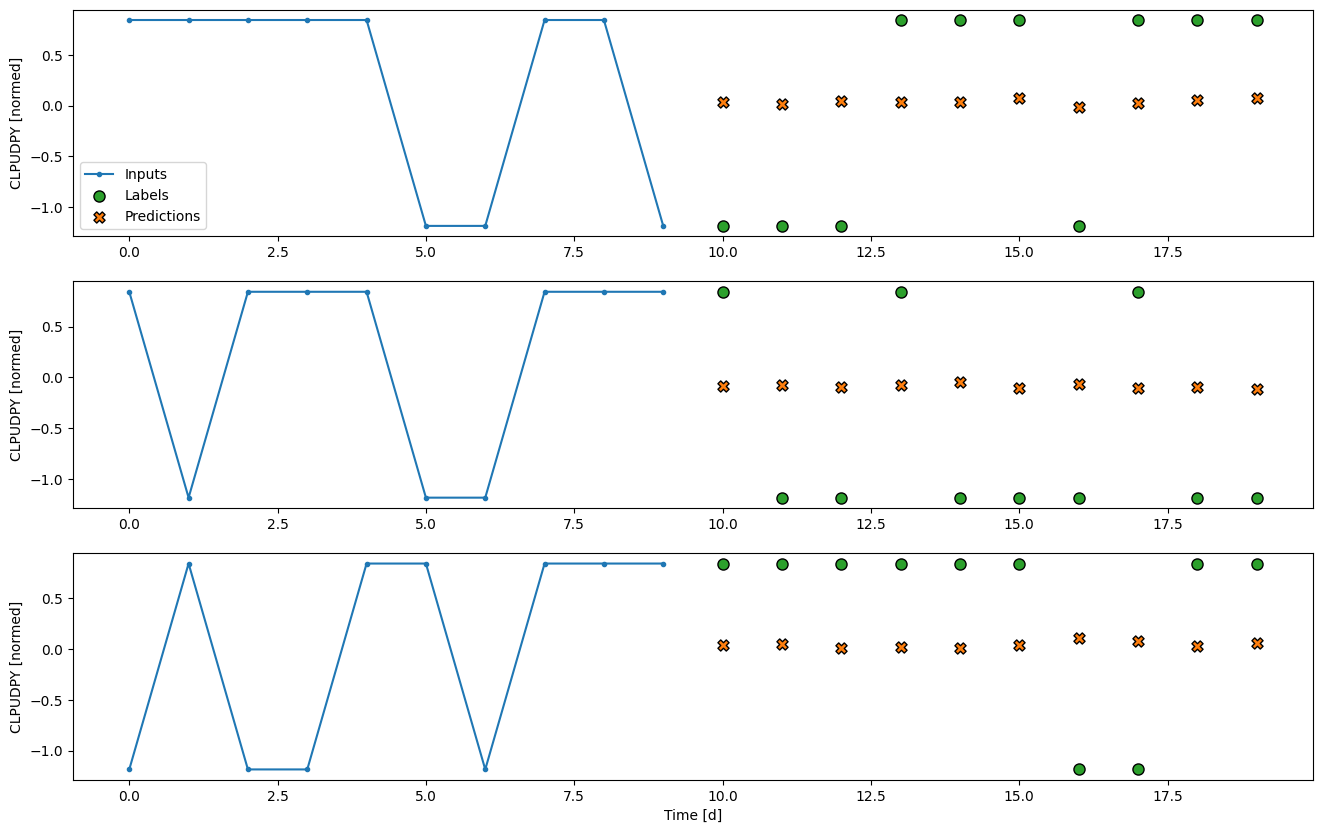

In [51]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

15/15 [==============================] - 0s 2ms/step - loss: 2.2599 - mean_absolute_error: 1.1656


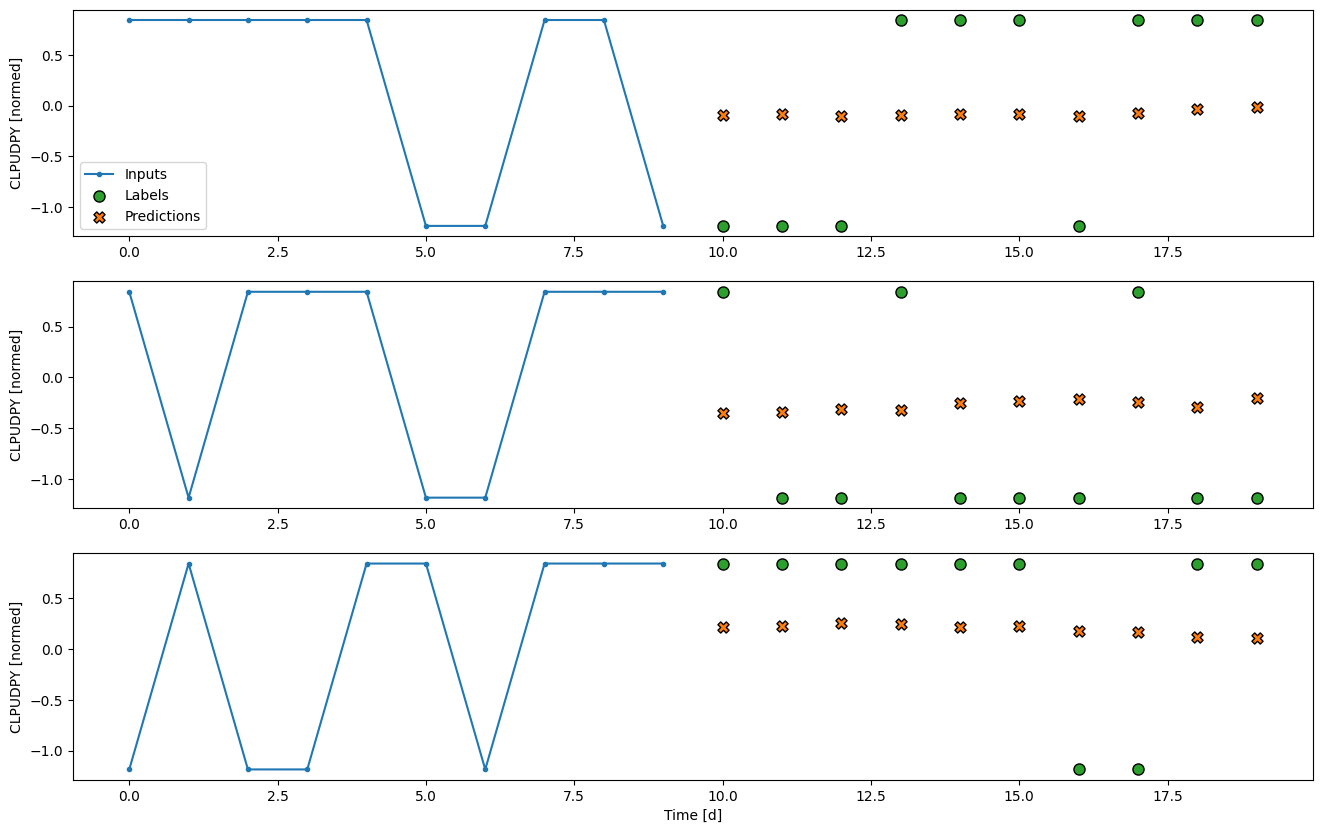

In [52]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)